# importing the MLBox

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

Using Theano backend.
/home/datageek/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
paths = ["train_classification.csv", "test_classification.csv"]
target_name = "Survived"

# reading and cleaning all files 

In [3]:
rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)


reading csv : train.csv ...
cleaning data ...
CPU time: 0.653312921524 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 0.48629283905 seconds

> Number of common features : 11

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 5
> Number of numerical features: 6
> Number of training samples : 891
> Number of test samples : 418

> Top sparse features (% missing values on train set):
Cabin       77.1
Age         19.9
Embarked     0.2
dtype: float64

> Task : classification
0.0    549
1.0    342
Name: Survived, dtype: int64

encoding target ...


In [4]:
dft = Drift_thresholder()
df = dft.fit_transform(df)


computing drifts ...
CPU time: 0.375258922577 seconds

> Top 10 drifts

('PassengerId', 1.0)
('Name', 0.99408885871654995)
('Ticket', 0.69158126654553254)
('Cabin', 0.19101400836012727)
('Embarked', 0.076694741085090445)
('SibSp', 0.042687046335085466)
('Fare', 0.034880025978640816)
('Sex', 0.033888348738664087)
('Pclass', 0.027642879511516671)
('Parch', 0.019840186517769975)

> Deleted variables : ['Name', 'PassengerId', 'Ticket']
> Drift coefficients dumped into directory : save


# tuning

In [5]:
opt = Optimiser(scoring = 'accuracy', n_folds = 3)

/home/datageek/anaconda2/lib/python2.7/site-packages/mlbox/optimisation/optimiser.py:78: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [6]:
opt.evaluate(None, df)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'max_depth': -1, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'min_child_samples': 10, 'boosting_type': 'gbdt'}


MEAN SCORE : accuracy = 0.808080808081
VARIANCE : 0.0119832528081 (fold 1 = 0.79797979798, fold 2 = 0.824915824916, fold 3 = 0.801346801347)
CPU time: 2.34652495384 seconds



0.80808080808080807

In [7]:
space = {
    
        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]}, 
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},    
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}
    
        }

best = opt.optimise(space, df,15)


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'threshold': 0.011643291262151802, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'max_depth': 7, 'boosting_type': 'gbdt'}



/home/datageek/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



MEAN SCORE : accuracy = 0.802469135802
VARIANCE : 0.018713054995 (fold 1 = 0.784511784512, fold 2 = 0.828282828283, fold 3 = 0.794612794613)
CPU time: 2.45729398727 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'threshold': 0.02770267453219974, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'max_depth': 5, 'boosting_type': 'gbdt'}


MEAN SCORE : accuracy = 0.786756453423
VARIANCE : 0.017459426696


MEAN SCORE : accuracy = 0.805836139169
VARIANCE : 0.0135612188256 (fold 1 = 0.794612794613, fold 2 = 0.824915824916, fold 3 = 0.79797979798)
CPU time: 0.355047941208 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'threshold': 0.05152651209916837, 'strategy': 'l1'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'max_depth': 3, 'boosting_type': 'gbdt'}


MEAN SCORE : accuracy = 0.800224466891
VARIANCE : 0.0111105442


fitting the pipeline ...
CPU time: 0.33674621582 seconds


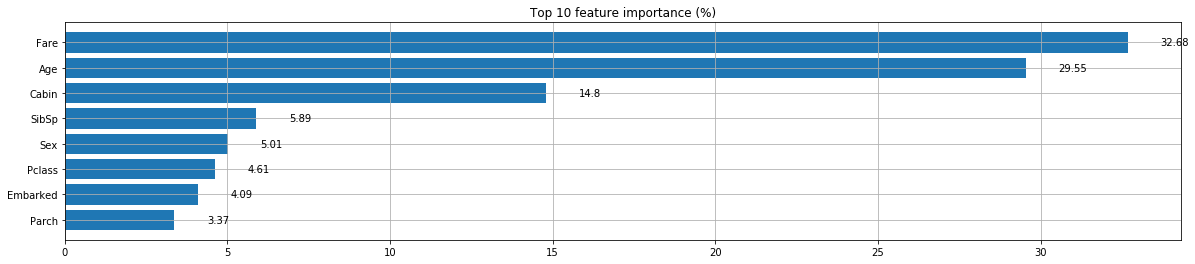


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.10400390625 seconds

> Overview on predictions : 

        0.0       1.0  Survived_predicted
0  0.918935  0.081065                   0
1  0.884135  0.115865                   0
2  0.949983  0.050017                   0
3  0.823442  0.176558                   0
4  0.685111  0.314889                   0
5  0.756447  0.243553                   0
6  0.505878  0.494122                   0
7  0.918484  0.081516                   0
8  0.162236  0.837764                   1
9  0.964890  0.035110                   0

dumping predictions into directory : save ...


<mlbox.prediction.predictor.Predictor instance at 0x7f2e3471ccb0>

In [8]:
prd = Predictor()
prd.fit_predict(best, df)